In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import env



In [ ]:
#1 A bank found that the average number of cars waiting during the noon hour at 
# a drive-up window follows a Poisson distribution with a mean of 2 cars. 
# Make a chart of this distribution and 
# answer these questions concerning the probability of cars waiting at the drive-up window.

In [ ]:
# What is the probability that no cars drive up in the noon hour?

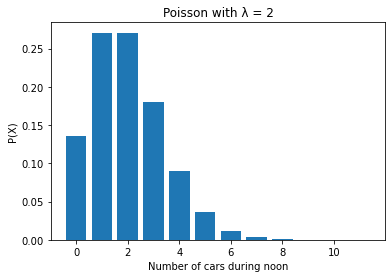

In [53]:
λ = 2
x = np.arange(0,12)
y = stats.poisson(λ).pmf(x)

# stats.poisson(λ)

plt.bar(x,y)
plt.title('Poisson with λ = 2')
plt.xlabel('Number of cars during noon')
plt.ylabel('P(X)')
plt.show()

In [55]:
λ = 2

round(stats.poisson(λ).pmf(0),2)

0.14

In [ ]:
# What is the probability that 3 or more cars come through the drive through?

In [56]:
round(stats.poisson(λ).sf(2), 2)

0.32

In [ ]:
# How likely is it that the drive through gets at least 1 car?

In [57]:
round(stats.poisson(λ).sf(0), 2)

0.86

In [ ]:
#2 Grades of State University graduates are normally distributed with a mean of 3.0 
# and a standard deviation of .3. Calculate the following:
# What grade point average is required to be in the top 5% of the graduating class?

In [88]:
μ = 3.0
σ = 0.3
p = 0.05

# stats.norm(μ, σ)

round(stats.norm(μ, σ).isf(p),2)

3.49

In [89]:
round(stats.norm(μ, σ).ppf(.95), 2)

3.49

In [ ]:
# What GPA constitutes the bottom 15% of the class?

In [60]:
p = .15

round(stats.norm(μ, σ).ppf(p), 2)

2.69

In [74]:
round(stats.norm(μ, σ).isf(.85), 2)

2.69

In [ ]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. 
# Would a student with a 2.8 grade point average qualify for this scholarship?

In [63]:
stats.norm(μ, σ).ppf([.2, .3])

array([2.74751363, 2.84267985])

In [ ]:
# If I have a GPA of 3.5, what percentile am I in?

In [90]:
round(stats.norm(μ, σ).cdf(3.5), 2)

0.95

In [92]:
round(stats.norm(μ, σ).sf(3.5), 2)

0.05

In [ ]:
#3 A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. 
# How likely is it that this many people or more click through?

In [94]:
n = 4326
p = .02

# stats.binom(n, p)

round(stats.binom(n, p).sf(96), 2)


0.14

In [96]:
# as a poisson distribution

λ = n * p
round(stats.poisson(λ).sf(96), 2)

0.14

In [ ]:
# 4 You are working on some statistics homework consisting of 100 questions 
# where all of the answers are a probability rounded to the hundreths place. 
# Looking to save time, you put down random probabilities as the answer to each question.

# What is the probability that at least one of your first 60 answers is correct?


In [66]:
n = 60
p = 0.01

# stats.binom(n, p)

round(stats.binom(n,p).sf(0), 2)

0.45

In [ ]:
#5 The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 
# and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day?

In [67]:
n = round(.9*3*22)
p = 0.03

# stats.binom(n, p)

round(stats.binom(n, p).sf(0), 2)

0.83

In [ ]:
# How likely is it that it goes two days without getting cleaned up?

In [69]:
round(stats.binom(n*2, p).pmf(0), 4)

0.0275

In [ ]:
# All week?

In [70]:
round(stats.binom(n*5, p).pmf(0), 4)

0.0001

In [ ]:
#6 You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
# After several weeks of careful observation, you notice that the average number of people in line 
# when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food before 
# you have to go back to class? Assume you have one hour for lunch, 
# and ignore travel time to and from La Panaderia.

In [75]:
μ = 15 * 2 #change to minutes
σ = 3 * 2 #change to minutes

time_for_lunch = 60
time_to_get_food = 10
time_to_order = 2
time_to_eat = 15

avail_time = time_for_lunch - (time_to_order + time_to_get_food + time_to_eat)

round(stats.norm(μ, σ).cdf(avail_time), 2)

0.69

In [76]:
μ = 15 # people
σ = 3 # people

# 33 / 2 will give equivalent people

round(stats.norm(μ, σ).cdf(33/2), 2)

0.69

In [ ]:
#7 Connect to the employees database and find the average salary of current employees, 
# along with the standard deviation. For the following questions, 
# calculate the answer based on modeling the employees salaries with a normal distribution 
# defined by the calculated mean and standard deviation then compare this answer to the actual values present 
# in the salaries dataset.

In [ ]:
# What percent of employees earn less than 60,000?

In [49]:
url = f'mysql+pymysql://{env.user_name}:{env.pass_word}@{env.host}/employees'
query = '''SELECT *
FROM salaries s
WHERE s.to_date > NOW()'''
    
df = pd.read_sql(query, url)

In [50]:
df

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [79]:
μ = df.salary.mean()
σ = df.salary.std()

μ, σ

(72012.23585730705, 17309.99538025198)

In [81]:
round(stats.norm(μ, σ).cdf(60000), 2)

0.24

In [ ]:
# What percent of employees earn more than 95,000?

In [82]:
round(stats.norm(μ, σ).sf(95000), 2)

0.09

In [ ]:
# What percent of employees earn between 65,000 and 80,000?

In [44]:
stats.norm(μ, σ).cdf([65000, 80000])

array([0.34270292, 0.67776349])

In [43]:
np.diff(stats.norm(μ, σ).cdf([65000, 80000]))

array([0.33506057])

In [ ]:
# What do the top 5% of employees make?

In [84]:
round(stats.norm(μ, σ).isf(.05), 2)

100484.64

In [83]:
round(df.salary.quantile(.95),2) #data is slighttly skewed

104225.85